In [1]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
# Loading Trained LoRA Weights
pipe.load_lora_weights("caemuller/anime_gen")

In [3]:
prompt = "A Dachsund walks confidently down a dirt path"
image = pipe(
    prompt = prompt,
    num_inference_steps=50,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

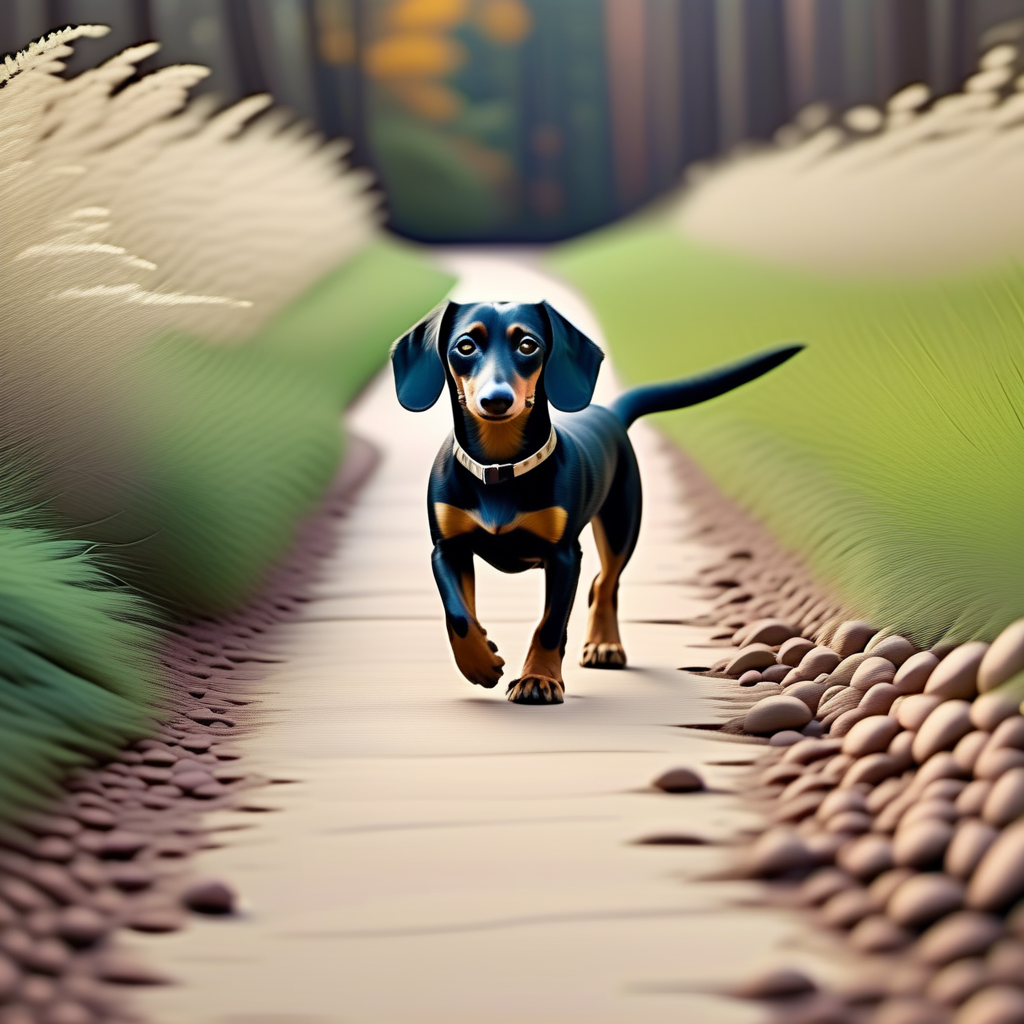

In [4]:
image

In [4]:
del image